In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [5]:
df = pd.read_csv('/content/train.csv', usecols =['GarageQual' , 'FireplaceQu' , 'SalePrice'])

In [6]:
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [7]:
df.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

<Axes: >

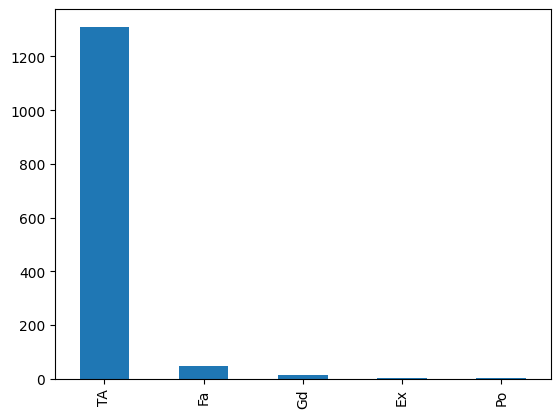

In [9]:
# first we'll look into garage column

df['GarageQual'].value_counts().plot(kind ='bar')

In [10]:
# calculating mode

df['GarageQual'].mode()

0    TA
Name: GarageQual, dtype: object

Text(0.5, 1.0, 'GarageQual')

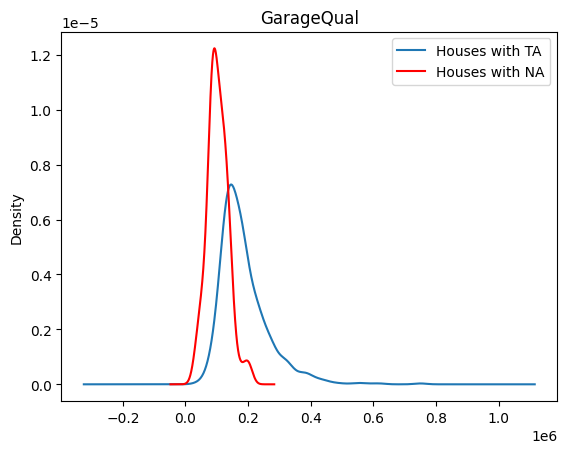

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['GarageQual']=='TA']['SalePrice'].plot(kind='kde', ax=ax)

df[df['GarageQual'].isnull()]['SalePrice'].plot(kind='kde', ax=ax, color ='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Houses with TA' , 'Houses with NA']
ax.legend(lines, labels, loc ='best')

plt.title('GarageQual')

In [14]:
# here we try to store the blue curve in a variable, temp

temp = df[df['GarageQual'] =='TA']['SalePrice']

In [16]:
# here we will fill the missing values with the most frequent value - TA

df['GarageQual'].fillna('TA', inplace = True)


<Axes: >

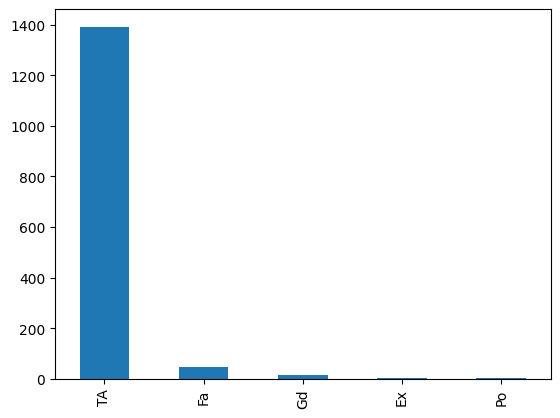

In [17]:
df['GarageQual'].value_counts().plot(kind = 'bar')

Text(0.5, 1.0, 'GarageQual')

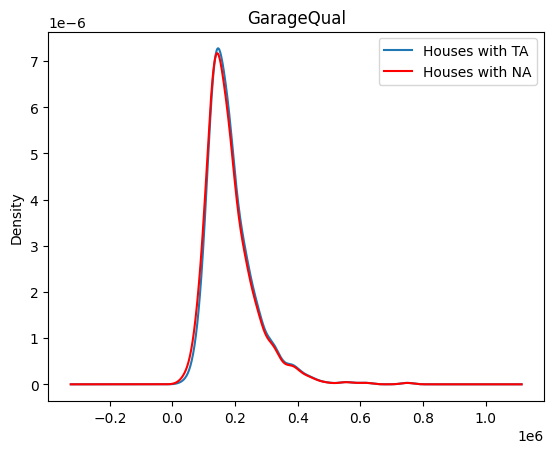

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original plot
temp.plot(kind = 'kde' ,ax=ax)

# distribution of the variable after imputation
df[df['GarageQual']=='TA']['SalePrice'].plot(kind='kde', ax=ax, color ='red')


lines, labels = ax.get_legend_handles_labels()
labels = ['Houses with TA' , 'Houses with NA']
ax.legend(lines, labels, loc ='best')

plt.title('GarageQual')

<Axes: >

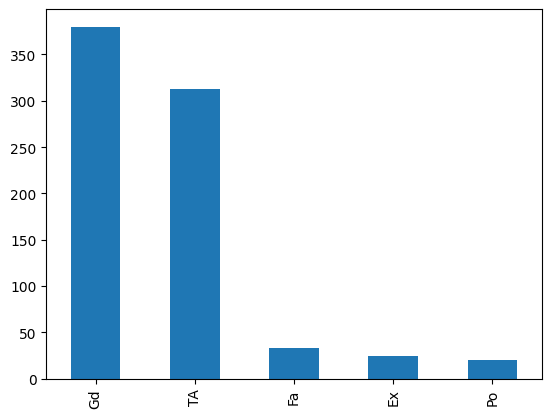

In [20]:
# now dealing with fireplace quality variable

df['FireplaceQu'].value_counts().plot(kind ='bar')

In [21]:
df['FireplaceQu'].mode()

0    Gd
Name: FireplaceQu, dtype: object

Text(0.5, 1.0, 'FireplaceQu')

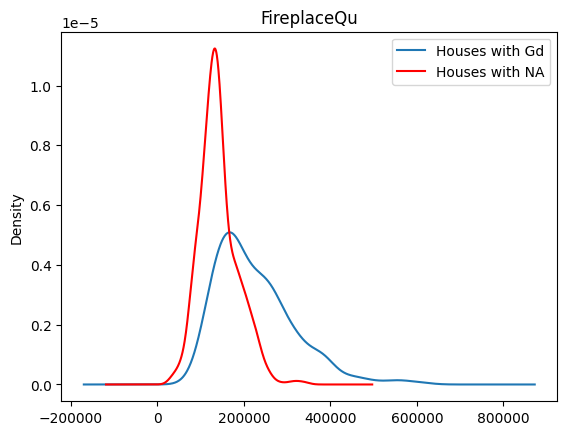

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111)


df[df['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde', ax=ax)

df[df['FireplaceQu'].isnull()]['SalePrice'].plot(kind='kde', ax=ax, color ='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Houses with Gd' , 'Houses with NA']
ax.legend(lines, labels, loc ='best')

plt.title('FireplaceQu')

In [24]:
temp = df[df['FireplaceQu']=='Gd']['SalePrice']

In [27]:
# if we fill the missing values with most frequent value - Gd
df['FireplaceQu'].fillna('Gd', inplace = True)

<Axes: >

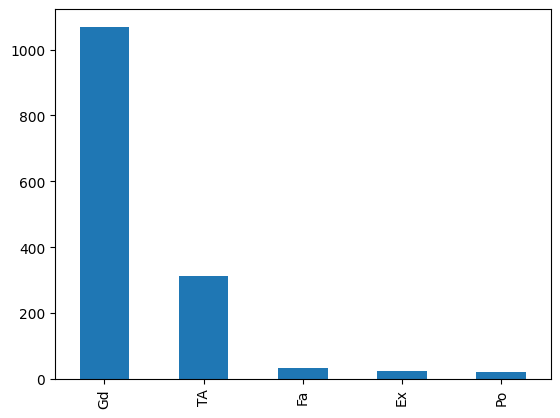

In [28]:
df['FireplaceQu'].value_counts().plot(kind = 'bar')

Text(0.5, 1.0, 'FireplaceQu')

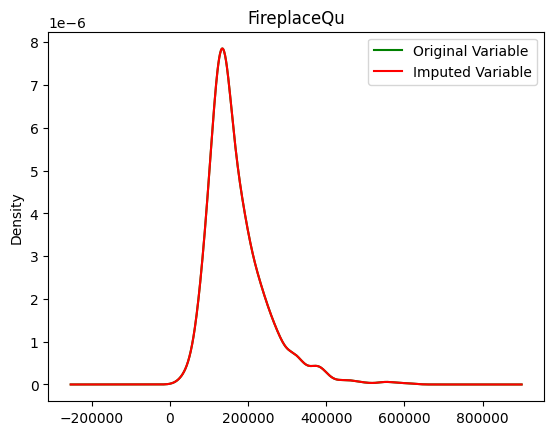

In [34]:
fig = plt.figure()
ax = fig.add_subplot(111)

temp.plot(kind='kde',ax=ax, color ='green')

# distribution of variable after imputation
df[df['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Original Variable' , 'Imputed Variable']
ax.legend(lines, labels, loc ='best')

plt.title('FireplaceQu')

**mera distribtution bohot alg aa rha hai**

In [35]:
from sklearn.model_selection import train_test_split
X_train, y_train, x_test, y_test = train_test_split(df.drop(columns =['SalePrice']), df['SalePrice'],test_size =0.2)

In [36]:
from sklearn.impute import SimpleImputer

In [37]:
imputer = SimpleImputer(strategy ='most_frequent')

In [38]:
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


In [39]:
imputer.statistics_

array(['Gd', 'TA'], dtype=object)

# **Now we will see the second technique**

In [40]:
dff = pd.read_csv('/content/train.csv', usecols =['GarageQual' , 'FireplaceQu' , 'SalePrice'])

In [41]:
dff.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [42]:
dff.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

Text(0, 0.5, 'Number of houses')

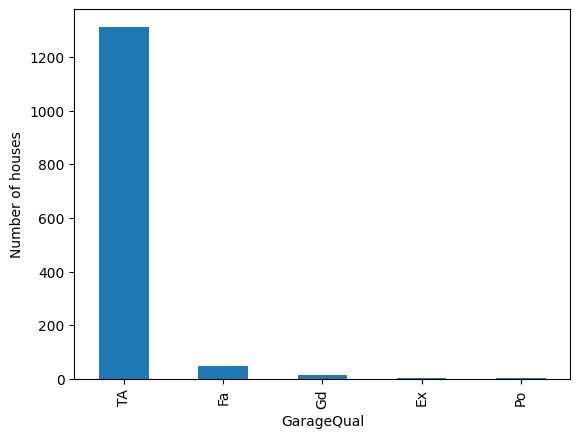

In [46]:
dff['GarageQual'].value_counts().sort_values(ascending = False).plot.bar()
plt.xlabel('GarageQual')
plt.ylabel('Number of houses')

In [47]:
# missing values get imputed by 'missing'

dff['GarageQual'].fillna('Missing', inplace = True)

Text(0, 0.5, 'Number of houses')

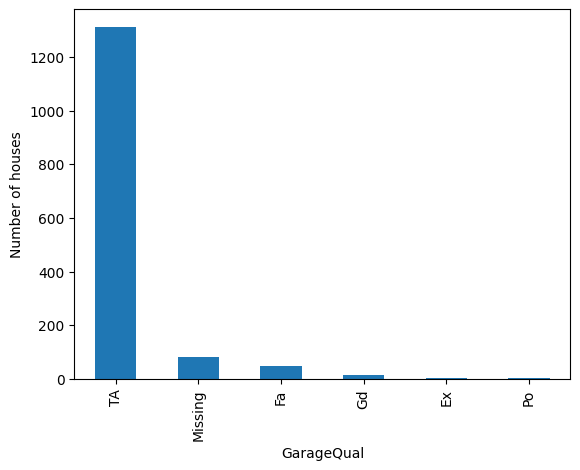

In [48]:
dff['GarageQual'].value_counts().sort_values(ascending = False).plot.bar()
plt.xlabel('GarageQual')
plt.ylabel('Number of houses')

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns =['SalePrice']), df['SalePrice'], test_size = 0.2)


In [50]:
from sklearn.impute import SimpleImputer

In [51]:
imputer = SimpleImputer(strategy ='constant', fill_value ='Missing')

In [52]:
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


In [53]:
imputer.statistics_

array(['Missing', 'Missing'], dtype=object)